In [243]:
#Importa la libreria Pandas
import pandas as pd


In [244]:
#Se leen los datos encontrados en bloque neon 
datos_brutos = pd.read_csv("datos_apartamentos_rent.csv", encoding="latin-1", sep=";")
datos_brutos.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$ 790,Monthly,101,NaN,Washington,DC,"38,9057","-76,9861",RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$ 425,Monthly,106,814 Schutte Rd,Evansville,IN,"37,968","-87,6621",RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1,0.0,USD,No,Thumbnail,...,$ 1.390,Monthly,107,NaN,Arlington,VA,"38,891","-77,0816",RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1,0.0,USD,No,Thumbnail,...,$ 925,Monthly,116,1717 12th Avenue,Seattle,WA,"47,616","-122,3275",RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$ 880,Monthly,125,NaN,Arlington,VA,"38,8738","-77,1055",RentLingo,1577359401


In [245]:
#Se leen los datos despues del proceso de limpieza
datos_limpios=pd.read_csv("datos_limpios.csv", encoding="latin-1", sep=";")
datos_limpios.head()

,id,bathrooms,bedrooms,price,square_feet,cityname,state,latitude,longitude,time,...,source_Listanza,source_ListedBuy,source_RENTCafé,source_RENTOCULAR,source_Real Estate Agent,source_RealRentals,source_RentDigs.com,source_RentLingo,source_rentbits,source_tenantcloud
0,5668626895,1,0,790,101,1468,7,"38,9057","-76,9861",1577359415,...,0,0,0,0,0,0,0,1,0,0
1,5664597177,1,1,425,106,449,15,"37,968","-87,6621",1577017063,...,0,0,0,0,0,0,0,1,0,0
2,5668626833,1,0,1390,107,52,45,"38,891","-77,0816",1577359410,...,0,0,0,0,0,0,0,1,0,0
3,5659918074,1,0,925,116,1285,47,"47,616","-122,3275",1576667743,...,0,0,0,0,0,0,0,1,0,0
4,5668626759,1,0,880,125,52,45,"38,8738","-77,1055",1577359401,...,0,0,0,0,0,0,0,1,0,0


In [246]:
#Se crea un DataFrame de datos finales
datos_finales=pd.DataFrame()

In [247]:
#Las filas vacias de la columna pets_allowed del DataFrame se llenan con el valor de "Ninguno"
datos_finales['pets_allowed'] = datos_brutos['pets_allowed']
datos_finales["pets_allowed"] = datos_finales["pets_allowed"].fillna("Ninguno")


In [248]:
# Crear un diccionario con índices únicos de la columna pets_allowed
unique_types = {tipo: idx for idx, tipo in enumerate(datos_finales["pets_allowed"].unique())}
# Aplicar la codificación
datos_finales["pets_allowed"] = datos_finales["pets_allowed"].map(unique_types)

In [249]:
#Mostrar los datos finales
datos_finales.head(259)

,pets_allowed
0,0
1,0
2,0
3,0
4,0
...,...
254,0
255,0
256,2
257,3


In [250]:
#Copiar la columna Source del DataFrame original al DataFrame final
datos_finales['source'] = datos_brutos['source']
# Crear un diccionario con índices únicos de la columna Source
unique_types = {tipo: idx for idx, tipo in enumerate(datos_finales["source"].unique())}
# Aplicar la codificación
datos_finales["source"] = datos_finales["source"].map(unique_types)

In [251]:
#Mostrar resultados 
datos_finales.head(259)

,pets_allowed,source
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
254,0,0
255,0,3
256,2,0
257,3,0


In [252]:
datos_finales['has_photo'] = datos_brutos['has_photo']
# Crear un diccionario con índices únicos de la columna has_photo
unique_types = {tipo: idx for idx, tipo in enumerate(datos_finales["has_photo"].unique())}
# Aplicar la codificación
datos_finales["has_photo"] = datos_finales["has_photo"].map(unique_types)
datos_finales.head(20)

,pets_allowed,source,has_photo
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,1,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [253]:
datos_finales['category'] = datos_brutos['category']
# Crear un diccionario con índices únicos de la columna category
unique_types = {tipo: idx for idx, tipo in enumerate(datos_finales["category"].unique())}
# Aplicar la codificación
datos_finales["category"] = datos_finales["category"].map(unique_types)
datos_finales.head(10)

,pets_allowed,source,has_photo,category
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,1,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [254]:
#Copiar las columnas no categoricas en el Dataframe datos_finales
datos_finales[["amenities_count", "state", "cityname","square_feet","price","bedrooms","id","time","latitude","longitude"]]=datos_limpios[["amenities_count", "state", "cityname","square_feet","price","bedrooms","id","time","latitude","longitude"]]

In [255]:
#Reemplazar los datos que esten en formato string convirtiendolos en numeros 
datos_finales["bathrooms"]= datos_limpios["bathrooms"].str.replace(",", ".").astype(float)

In [256]:
#Mostrar datos_finales
datos_finales.head()

,pets_allowed,source,has_photo,category,amenities_count,state,cityname,square_feet,price,bedrooms,id,time,latitude,longitude,bathrooms
0,0,0,0,0,0,7,1468,101,790,0,5668626895,1577359415,"38,9057","-76,9861",1.0
1,0,0,0,0,0,15,449,106,425,1,5664597177,1577017063,"37,968","-87,6621",1.0
2,0,0,0,0,0,45,52,107,1390,0,5668626833,1577359410,"38,891","-77,0816",1.0
3,0,0,0,0,0,47,1285,116,925,0,5659918074,1576667743,"47,616","-122,3275",1.0
4,0,0,0,0,0,45,52,125,880,0,5668626759,1577359401,"38,8738","-77,1055",1.0


In [257]:
#Descargar librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset 
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error

In [258]:
#Para que los datos puedan ser leidos como numeros, se debe cambiar la coma por el punto
datos_limpios = datos_limpios.replace(',', '.', regex=True).astype(float)

In [259]:
#Primer modelo regresion lineal simple teniendo en cuenta los datos limpios

In [260]:
# Separar la variable objetivo (precio) y las variables predictoras
X = datos_limpios[["latitude","longitude","bathrooms","bedrooms","square_feet","cityname","state",'amenities_count', 'pets_allowed_Cats,Dogs', 'pets_allowed_No', 'source_ListedBuy', 'source_RentDigs.com', 'source_RentLingo',"source_Listanza","has_photo_Thumbnail","has_photo_Yes","category_housing/rent/home","category_housing/rent/short_term"
]]
y = datos_limpios['price']
# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [261]:
# Definir el modelo
model = LinearRegression()
# Entrenar el modelo con los datos originales
model.fit(X_train, y_train)
# Predicciones
y_pred_train1 = model.predict(X_train)
y_pred_test1 = model.predict(X_test)
# Evaluación del modelo
# R2
r2_train = r2_score(y_train, y_pred_train1)
r2_test = r2_score(y_test, y_pred_test1)
#RMSE
rmse_train = root_mean_squared_error(y_train, y_pred_train1)  # RMSE
rmse_test = root_mean_squared_error(y_test, y_pred_test1)
# Evitar división por cero en MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_train = mean_absolute_percentage_error(y_train, y_pred_train1)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test1)
# Resultados
print("Métricas en Entrenamiento:")
print(f"R2: {r2_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAPE: {mape_train:.2f}%")

print("\nMétricas en Prueba:")
print(f"R2: {r2_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAPE: {mape_test:.2f}%")

Métricas en Entrenamiento:
R2: 0.3475
RMSE: 585.7568
MAPE: 33.30%

Métricas en Prueba:
R2: 0.3343
RMSE: 581.2042
MAPE: 33.52%


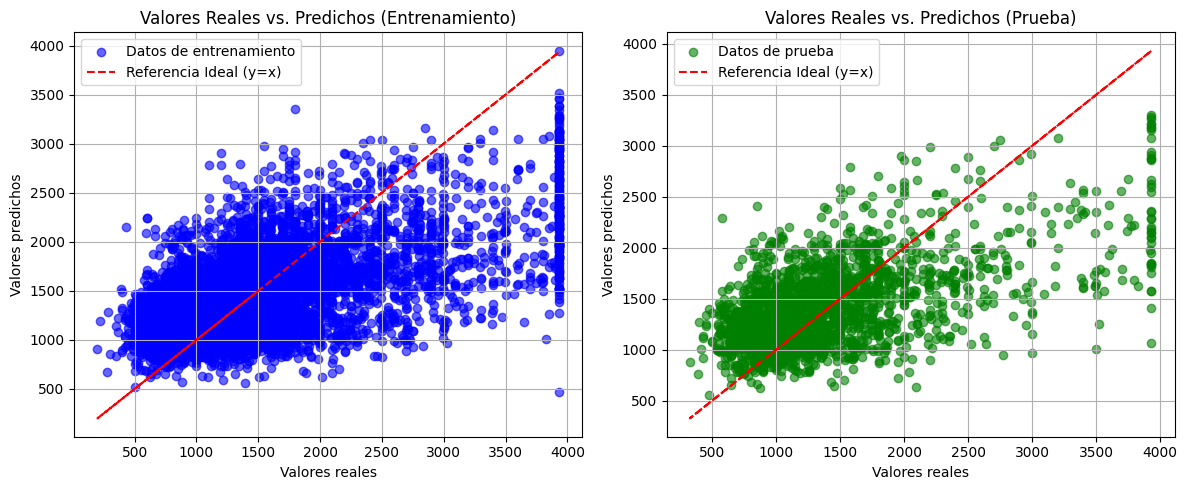

In [262]:
# Graficar valores reales vs predichos
plt.figure(figsize=(12, 5))
# Gráfico para conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train1, alpha=0.6, color='blue', label="Datos de entrenamiento")
plt.plot(y_train, y_train, color='red', linestyle="--", label="Referencia Ideal (y=x)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores Reales vs. Predichos (Entrenamiento)")
plt.legend()
plt.grid(True)
# Gráfico para conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test1, alpha=0.6, color='green', label="Datos de prueba")
plt.plot(y_test, y_test, color='red', linestyle="--", label="Referencia Ideal (y=x)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores Reales vs. Predichos (Prueba)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

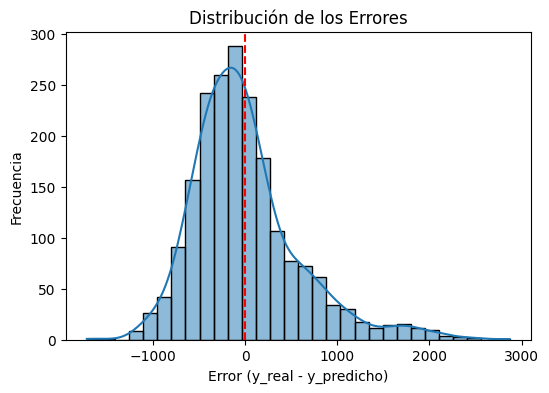

In [263]:
#Grafico de la distribucion de errores
errores1 = y_test - y_pred_test1
plt.figure(figsize=(6,4))
sns.histplot(errores1, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Error (y_real - y_predicho)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Errores")
plt.show()

In [264]:
#Segundo modelo, regresion lineal Ridge con estandarización de variables teniendo en cuenta los datos limpios

In [265]:

# Estandarizar las variables
scaler_X2 = StandardScaler()
scaler_y2 = StandardScaler()
X_train_scaled2 = scaler_X2.fit_transform(X_train)
X_test_scaled2 = scaler_X2.transform(X_test)
y_train_scaled2 = scaler_y2.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled2 = scaler_y2.transform(y_test.values.reshape(-1, 1)).ravel()

# Definir los valores de alpha a probar
alpha_values2 = np.logspace(-1, 4, 50)
best_alpha2 = None
best_score2 = -float("inf")

# Validación cruzada para encontrar el mejor alpha en Ridge
for alpha in alpha_values2:
    model2 = Ridge(alpha=alpha)
    scores2 = cross_val_score(model2, X_train_scaled2, y_train_scaled2, cv=10, scoring="r2")  # 20-fold CV
    mean_score2 = scores2.mean()
    
    print(f"Alpha: {alpha}, R² promedio en validación cruzada: {mean_score2:.4f}")
    
    if mean_score2 > best_score2:
        best_score2 = mean_score2
        best_alpha2 = alpha

print(f"\nMejor alpha encontrado: {best_alpha2}")

# Entrenar el modelo final con el mejor alpha
model_final2 = Ridge(alpha=best_alpha2)
model_final2.fit(X_train_scaled2, y_train_scaled2)

# Predicciones
y_pred_train_scaled2 = model_final2.predict(X_train_scaled2)
y_pred_test_scaled2 = model_final2.predict(X_test_scaled2)

# Desescalar las predicciones
y_pred_train2 = scaler_y2.inverse_transform(y_pred_train_scaled2.reshape(-1, 1)).ravel()
y_pred_test2 = scaler_y2.inverse_transform(y_pred_test_scaled2.reshape(-1, 1)).ravel()

# Evaluación del modelo
#R2
r2_train2 = r2_score(y_train, y_pred_train2)
r2_test2 = r2_score(y_test, y_pred_test2)
#RMSE
rmse_train2 = root_mean_squared_error(y_train, y_pred_train2)
rmse_test2 = root_mean_squared_error(y_test, y_pred_test2)
# Evitar división por cero en MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100

mape_train2 = mean_absolute_percentage_error(y_train, y_pred_train2)
mape_test2 = mean_absolute_percentage_error(y_test, y_pred_test2)

# Resultados
print("\nMétricas en Entrenamiento:")
print(f"R²: {r2_train2:.4f}")
print(f"RMSE: {rmse_train2:.4f}")
print(f"MAPE: {mape_train2:.2f}%")

print("\nMétricas en Prueba:")
print(f"R²: {r2_test2:.4f}")
print(f"RMSE: {rmse_test2:.4f}")
print(f"MAPE: {mape_test2:.2f}%")

# Mostrar coeficientes del modelo final
coeficientes_originales = model_final2.coef_ / scaler_y2.scale_
print("\nCoeficientes del modelo Ridge (desescalados):")
print(coeficientes_originales)



Alpha: 0.1, R² promedio en validación cruzada: 0.3432
Alpha: 0.12648552168552962, R² promedio en validación cruzada: 0.3432
Alpha: 0.15998587196060582, R² promedio en validación cruzada: 0.3432
Alpha: 0.20235896477251572, R² promedio en validación cruzada: 0.3432
Alpha: 0.2559547922699536, R² promedio en validación cruzada: 0.3432
Alpha: 0.3237457542817644, R² promedio en validación cruzada: 0.3432
Alpha: 0.40949150623804254, R² promedio en validación cruzada: 0.3432
Alpha: 0.5179474679231212, R² promedio en validación cruzada: 0.3432
Alpha: 0.655128556859551, R² promedio en validación cruzada: 0.3432
Alpha: 0.8286427728546845, R² promedio en validación cruzada: 0.3432
Alpha: 1.0481131341546859, R² promedio en validación cruzada: 0.3432
Alpha: 1.3257113655901096, R² promedio en validación cruzada: 0.3432
Alpha: 1.6768329368110082, R² promedio en validación cruzada: 0.3432
Alpha: 2.1209508879201904, R² promedio en validación cruzada: 0.3432
Alpha: 2.682695795279726, R² promedio en valid

In [266]:
print(f"\nMejor alpha encontrado: {best_alpha2}")


Mejor alpha encontrado: 44.98432668969444


In [267]:
print("\nMétricas en Entrenamiento:")
print(f"R²: {r2_train2:.4f}")
print(f"RMSE: {rmse_train2:.4f}")
print(f"MAPE: {mape_train2:.2f}%")

print("\nMétricas en Prueba:")
print(f"R²: {r2_test2:.4f}")
print(f"RMSE: {rmse_test2:.4f}")
print(f"MAPE: {mape_test2:.2f}%")


Métricas en Entrenamiento:
R²: 0.3475
RMSE: 585.7814
MAPE: 33.32%

Métricas en Prueba:
R²: 0.3342
RMSE: 581.2453
MAPE: 33.54%


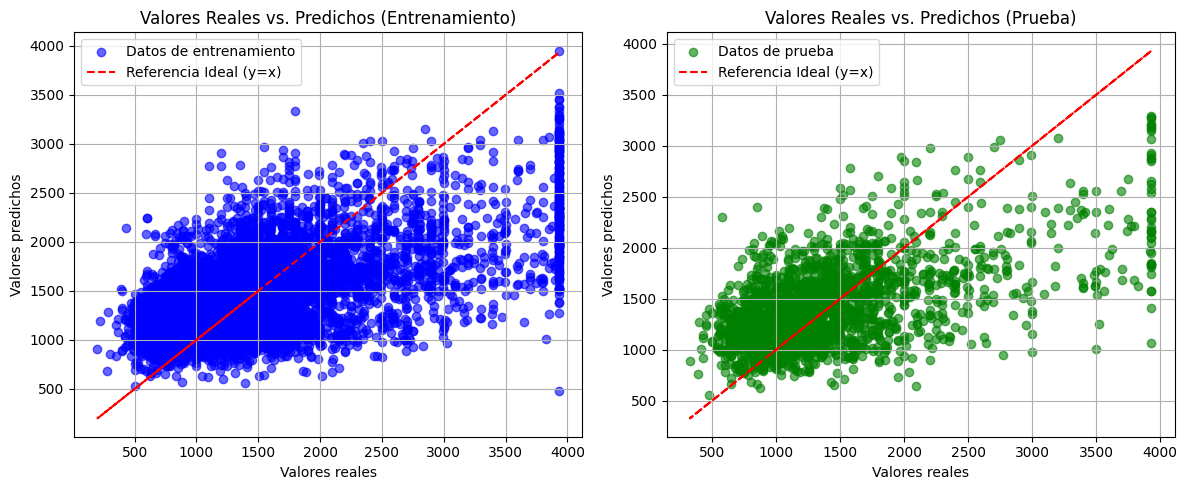

In [268]:
# Graficar valores reales vs predichos
plt.figure(figsize=(12, 5))

# Gráfico para conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train2, alpha=0.6, color='blue', label="Datos de entrenamiento")
plt.plot(y_train, y_train, color='red', linestyle="--", label="Referencia Ideal (y=x)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores Reales vs. Predichos (Entrenamiento)")
plt.legend()
plt.grid(True)

# Gráfico para conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test2, alpha=0.6, color='green', label="Datos de prueba")
plt.plot(y_test, y_test, color='red', linestyle="--", label="Referencia Ideal (y=x)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores Reales vs. Predichos (Prueba)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

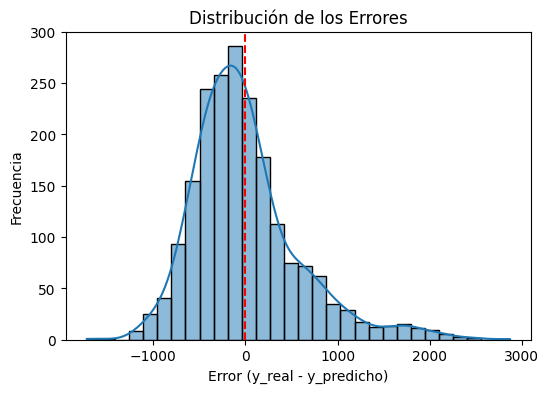

In [269]:
#Grafico de distribucion de los errores
errores2 = y_test - y_pred_test2
plt.figure(figsize=(6,4))
sns.histplot(errores2, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Error (y_real - y_predicho)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Errores")
plt.show()

In [270]:
#Corroborar la no linealidad de las variables

In [271]:
#Se realiza el Test RESET segun las variables escogidas para realizar el modelo
X_train_const = sm.add_constant(X_train)  # Agregar constante para OLS
model = sm.OLS(y_train, X_train_const).fit()  # Ajustar modelo
reset_test = linear_reset(model, power=2,test_type="fitted")  # Test RESET
print(reset_test)

<Wald test (chi2): statistic=171.96835622954168, p-value=2.7496155467540682e-39, df_denom=1>


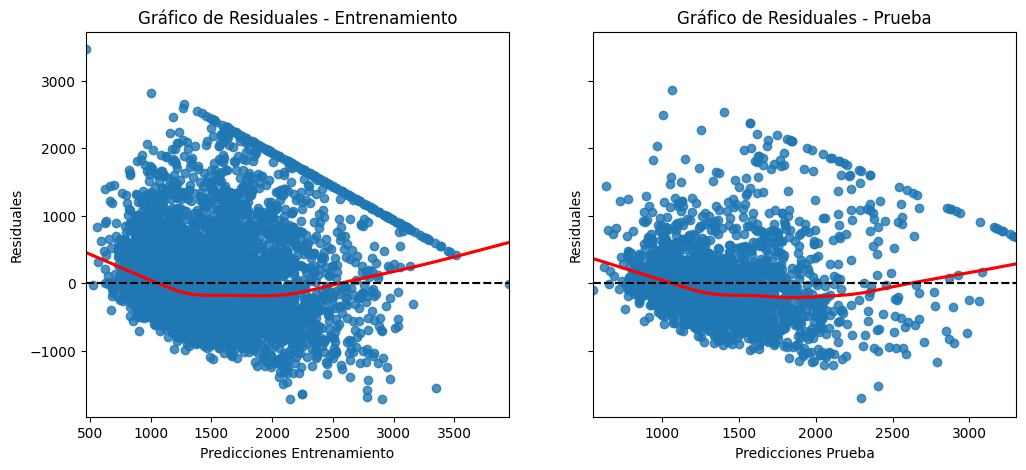

In [272]:
#Grafico de predicciones vs residuales 
# Calcular los residuales
residuales_train = y_train - y_pred_train1
residuales_test = y_test - y_pred_test1
# Crear la figura con dos subgráficos para entrenamiento y prueba
fig, ax = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)
# Gráfico de residuales para el conjunto de entrenamiento
sns.residplot(x=y_pred_train1, y=residuales_train, lowess=True, line_kws={"color": "red"}, ax=ax[0])
ax[0].axhline(y=0, color='black', linestyle='--')
ax[0].set_xlabel("Predicciones Entrenamiento")
ax[0].set_ylabel("Residuales")
ax[0].set_title("Gráfico de Residuales - Entrenamiento")
# Gráfico de residuales para el conjunto de prueba
sns.residplot(x=y_pred_test1, y=residuales_test, lowess=True, line_kws={"color": "red"}, ax=ax[1])
ax[1].axhline(y=0, color='black', linestyle='--')
ax[1].set_xlabel("Predicciones Prueba")
ax[1].set_ylabel("Residuales")
ax[1].set_title("Gráfico de Residuales - Prueba")

plt.show()


In [273]:
#Primer modelo polinomico de grado 3 con regularizacion Ridge y estandarizacion de las variables teniendo en cuenta los datos limpios

In [274]:
# Separar la variable objetivo (precio) y las variables predictoras
X = datos_limpios[["latitude","longitude","bathrooms","bedrooms","square_feet","cityname","state",'amenities_count', 'pets_allowed_Cats,Dogs', 'pets_allowed_No', 'source_ListedBuy', 'source_RentDigs.com', 'source_RentLingo',"source_Listanza","has_photo_Thumbnail","has_photo_Yes","category_housing/rent/home","category_housing/rent/short_term"
]]
y = datos_limpios['price']

In [275]:
# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [276]:

# Escalamiento de variables
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()

# Generar características polinómicas
grado = 3  
poly = PolynomialFeatures(degree=grado)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Validación cruzada con Regresión Lineal
modelo_lineal = LinearRegression()
r2_scores = cross_val_score(modelo_lineal, X_train_poly, y_train_scaled, cv=10, scoring='r2')

# Resultados de la validación cruzada
for i, r2 in enumerate(r2_scores, start=1):
    print(f"Fold {i}: R² = {r2:.4f}")

print(f"\n Promedio de R²: {np.mean(r2_scores):.4f}")
print(f" Desviación estándar de R²: {np.std(r2_scores):.4f}")

# Entrenar el modelo final
modelo_lineal.fit(X_train_poly, y_train_scaled)

# Predicciones
y_train_pred_scaled = modelo_lineal.predict(X_train_poly)
y_test_pred_scaled = modelo_lineal.predict(X_test_poly)

# Desescalar predicciones
y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_test_pred = y_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Evaluación del modelo
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

print("\n **Resultados del Modelo**")
print(f" R² en entrenamiento: {r2_train:.4f}")
print(f" R² en prueba: {r2_test:.4f}")
print(f" RMSE en entrenamiento: {rmse_train:.4f}")
print(f" RMSE en prueba: {rmse_test:.4f}")

Fold 1: R² = 0.5602
Fold 2: R² = 0.1885
Fold 3: R² = 0.4746
Fold 4: R² = 0.5080
Fold 5: R² = 0.3121
Fold 6: R² = 0.4589
Fold 7: R² = -2.8238
Fold 8: R² = 0.3235
Fold 9: R² = 0.2176
Fold 10: R² = 0.5527

 Promedio de R²: 0.0772
 Desviación estándar de R²: 0.9753

 **Resultados del Modelo**
 R² en entrenamiento: 0.6772
 R² en prueba: 0.1562
 RMSE en entrenamiento: 412.0177
 RMSE en prueba: 654.3598


In [277]:

# Escalamos X e Y
X_scaler3 = StandardScaler()
y_scaler3 = StandardScaler()

X_train_scaled3 = X_scaler3.fit_transform(X_train)
X_test_scaled3 = X_scaler3.transform(X_test)

y_train_scaled3 = y_scaler3.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled3 = y_scaler3.transform(y_test.values.reshape(-1, 1)).ravel()

# Generamos características polinómicas
grado = 3  
poly = PolynomialFeatures(degree=grado)

X_train_poly3 = poly.fit_transform(X_train_scaled3)
X_test_poly3 = poly.transform(X_test_scaled3)

# Validación cruzada para encontrar el mejor alpha en Ridge
alpha_values3 =  np.logspace(-1, 4, 50)
best_alpha3 = None
best_score3 = -float("inf")

for alpha in alpha_values3:
    modelo_ridge3 = Ridge(alpha=alpha)
    scores3 = cross_val_score(modelo_ridge3, X_train_poly3, y_train_scaled3, cv=10, scoring='r2')
    mean_score3 = scores3.mean()
    
    print(f"Alpha: {alpha}, R² promedio: {mean_score3:.4f}")
    
    if mean_score3 > best_score3:
        best_score3 = mean_score3
        best_alpha3 = alpha

print(f"\nMejor alpha encontrado: {best_alpha3}")

# Entrenar el modelo con el mejor alpha
modelo_final3 = Ridge(alpha=best_alpha3)
modelo_final3.fit(X_train_poly3, y_train_scaled3)

# Predicciones en entrenamiento y prueba
y_train_pred_scaled3 = modelo_final3.predict(X_train_poly3)
y_test_pred_scaled3 = modelo_final3.predict(X_test_poly3)

# Desescalar las predicciones
y_train_pred3 = y_scaler3.inverse_transform(y_train_pred_scaled3.reshape(-1, 1)).ravel()
y_test_pred3 = y_scaler3.inverse_transform(y_test_pred_scaled3.reshape(-1, 1)).ravel()

# Calcular R² en entrenamiento y prueba
r2_train3 = r2_score(y_train, y_train_pred3)
r2_test3 = r2_score(y_test, y_test_pred3)

# Calcular RMSE
rmse_train3 = root_mean_squared_error(y_train, y_train_pred3)
rmse_test3 = root_mean_squared_error(y_test, y_test_pred3)

# Calcular MAPE evitando división por cero
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100

mape_train3 = mean_absolute_percentage_error(y_train, y_train_pred3)
mape_test3 = mean_absolute_percentage_error(y_test, y_test_pred3)

# Imprimir resultados
print(f"R² en entrenamiento: {r2_train3:.4f}")
print(f"R² en prueba: {r2_test3:.4f}")
print(f"RMSE en entrenamiento: {rmse_train3:.4f}")
print(f"RMSE en prueba: {rmse_test3:.4f}")
print(f"MAPE en entrenamiento: {mape_train3:.2f}%")
print(f"MAPE en prueba: {mape_test3:.2f}%")
# Obtener coeficientes
coeficientes3 = modelo_final3.coef_
nombres_features3 = poly.get_feature_names_out()



Alpha: 0.1, R² promedio: 0.4854
Alpha: 0.12648552168552962, R² promedio: 0.4918
Alpha: 0.15998587196060582, R² promedio: 0.4977
Alpha: 0.20235896477251572, R² promedio: 0.5031
Alpha: 0.2559547922699536, R² promedio: 0.5080
Alpha: 0.3237457542817644, R² promedio: 0.5124
Alpha: 0.40949150623804254, R² promedio: 0.5164
Alpha: 0.5179474679231212, R² promedio: 0.5202
Alpha: 0.655128556859551, R² promedio: 0.5236
Alpha: 0.8286427728546845, R² promedio: 0.5269
Alpha: 1.0481131341546859, R² promedio: 0.5300
Alpha: 1.3257113655901096, R² promedio: 0.5329
Alpha: 1.6768329368110082, R² promedio: 0.5356
Alpha: 2.1209508879201904, R² promedio: 0.5381
Alpha: 2.682695795279726, R² promedio: 0.5404
Alpha: 3.39322177189533, R² promedio: 0.5426
Alpha: 4.291934260128778, R² promedio: 0.5446
Alpha: 5.428675439323859, R² promedio: 0.5466
Alpha: 6.8664884500430015, R² promedio: 0.5484
Alpha: 8.685113737513529, R² promedio: 0.5503
Alpha: 10.985411419875584, R² promedio: 0.5522
Alpha: 13.894954943731374, R² p

In [278]:
print(f"\nMejor alpha encontrado: {best_alpha3}")


Mejor alpha encontrado: 596.3623316594643


In [279]:
print(f"R² en entrenamiento: {r2_train3:.4f}")
print(f"R² en prueba: {r2_test3:.4f}")

R² en entrenamiento: 0.6578
R² en prueba: 0.6218


In [280]:
#validación cruzada de 10 folds con impresión de los valores R2 ndividuales, su promedio y desviación estándar.

In [281]:
# Escalar X e Y
X_scaler3 = StandardScaler()
y_scaler3 = StandardScaler()
X_train_scaled3 = X_scaler3.fit_transform(X_train)
X_test_scaled3 = X_scaler3.transform(X_test)
y_train_scaled3 = y_scaler3.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled3 = y_scaler3.transform(y_test.values.reshape(-1, 1)).ravel()

# Generar características polinómicas
gradu = 3  # Grado del polinomio
poly = PolynomialFeatures(degree=gradu)

X_train_poly3 = poly.fit_transform(X_train_scaled3)
X_test_poly3 = poly.transform(X_test_scaled3)

# Definir el alpha específico teniendo en cuenta que ya encontramos el mejor
alpha_fijo = 596.3623316594643
# Crear modelo Ridge con alpha=100
modelo_ridge_cv = Ridge(alpha=alpha_fijo)

# Realizar validación cruzada y obtener los R² individuales
r2_scores_cv = cross_val_score(modelo_ridge_cv, X_train_poly3, y_train_scaled3, cv=10, scoring='r2')

# Imprimir cada R² obtenido en cada iteración de la validación cruzada
for i, r2 in enumerate(r2_scores_cv, start=1):
    print(f"Fold {i}: R² = {r2:.4f}")

# Imprimir promedio y desviación estándar de los R²
print(f"\nPromedio de R²: {np.mean(r2_scores_cv):.4f}")
print(f"Desviación estándar de R²: {np.std(r2_scores_cv):.4f}")


Fold 1: R² = 0.6104
Fold 2: R² = 0.5952
Fold 3: R² = 0.6169
Fold 4: R² = 0.5949
Fold 5: R² = 0.5953
Fold 6: R² = 0.6032
Fold 7: R² = 0.5372
Fold 8: R² = 0.5865
Fold 9: R² = 0.4931
Fold 10: R² = 0.6428

Promedio de R²: 0.5875
Desviación estándar de R²: 0.0404


In [282]:
# Obtener coeficientes y nombres de características del modelo polinomial de grado tres 
coeficientes_polinomicos3 = modelo_final3.coef_
nombres_caracteristicas3 = poly.get_feature_names_out(input_features=X_train.columns)

# Crear un DataFrame con términos y coeficientes
df_coef = pd.DataFrame({"Término": nombres_caracteristicas3, "Coeficiente": coeficientes_polinomicos3})

# Ordenar por magnitud del coeficiente para ver los más importantes
df_coef["Coeficiente_abs"] = df_coef["Coeficiente"].abs()
df_coef = df_coef.sort_values(by="Coeficiente_abs", ascending=False).drop(columns=["Coeficiente_abs"])

# Mostrar coeficientes ordenados
print("\nCoeficientes del Modelo Polinómico con Ridge:")
print(df_coef.to_string(index=False))


Coeficientes del Modelo Polinómico con Ridge:
                                                                           Término   Coeficiente
                                                                       longitude^2  3.319238e-01
                                                                 longitude state^2 -1.718294e-01
                                                                 longitude^2 state -1.639762e-01
                                                                           state^2  1.106950e-01
                                                              latitude^2 longitude  9.428374e-02
                                                              bedrooms square_feet -8.627436e-02
                                                              latitude longitude^2  7.658403e-02
                                                                           state^3  6.828535e-02
                                                                   longitude sta

In [283]:
coeficientes = coeficientes_polinomicos3
intercepto = modelo_final3.intercept_
np.save("modelo_coeficientes.npy", coeficientes)
np.save("modelo_intercepto.npy", intercepto)
import pickle

# Suponiendo que X_scaler3 es un objeto StandardScaler entrenado
with open("X_scaler3.pkl", "wb") as f:
    pickle.dump(X_scaler3, f)

print("StandardScaler guardado correctamente.")



StandardScaler guardado correctamente.


In [284]:
ejemplo = pd.DataFrame({"latitude": [33.5178], "longitude": [-112.085],"bathrooms":[1],"bedrooms":[1],"square_feet":[200],"cityname":[1100],"state":[3],'amenities_count':[1], 'pets_allowed_Cats,Dogs':[0], 'pets_allowed_No':[1], 'source_ListedBuy':[0], 'source_RentDigs.com':[0], 'source_RentLingo':[1],"source_Listanza":[0],"has_photo_Thumbnail":[1],"has_photo_Yes":[0],"category_housing/rent/home":[0],"category_housing/rent/short_term":[0]
})
ejemplo_scaled = X_scaler3.transform(ejemplo)
ejemplo_polinomico = poly.transform(ejemplo_scaled)
y_predicho_scaled = modelo_final3.intercept_ + np.dot(ejemplo_polinomico, coeficientes_polinomicos3)
y_predicho_real = y_scaler3.inverse_transform(y_predicho_scaled.reshape(-1, 1))
print(f"El valor predicho de y es: {y_predicho_real[0][0]}")

El valor predicho de y es: 904.331590531268


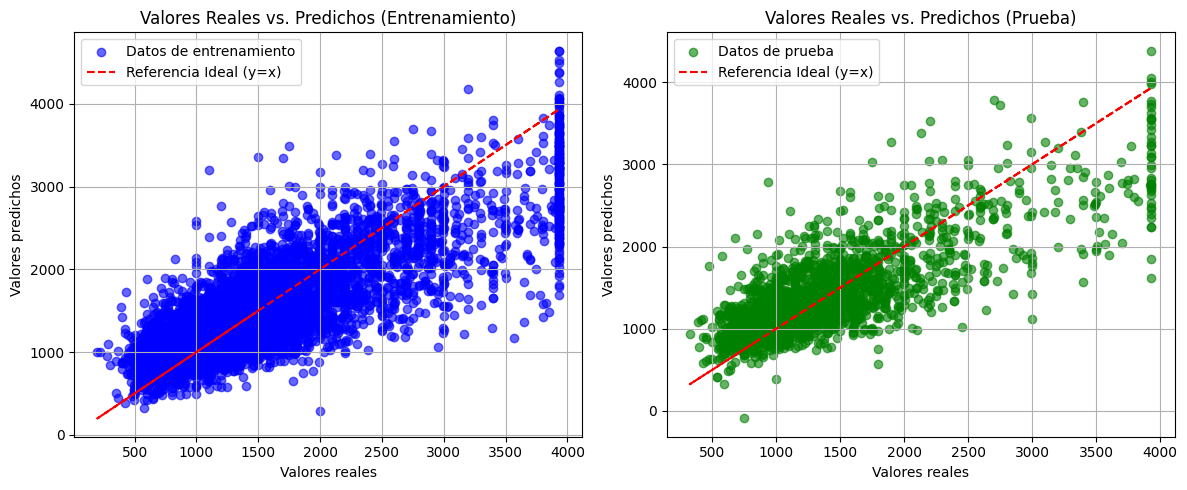

In [285]:
# Graficar valores reales vs predichos
plt.figure(figsize=(12, 5))

# Gráfico para conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred3, alpha=0.6, color='blue', label="Datos de entrenamiento")
plt.plot(y_train, y_train, color='red', linestyle="--", label="Referencia Ideal (y=x)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores Reales vs. Predichos (Entrenamiento)")
plt.legend()
plt.grid(True)

# Gráfico para conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred3, alpha=0.6, color='green', label="Datos de prueba")
plt.plot(y_test, y_test, color='red', linestyle="--", label="Referencia Ideal (y=x)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores Reales vs. Predichos (Prueba)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


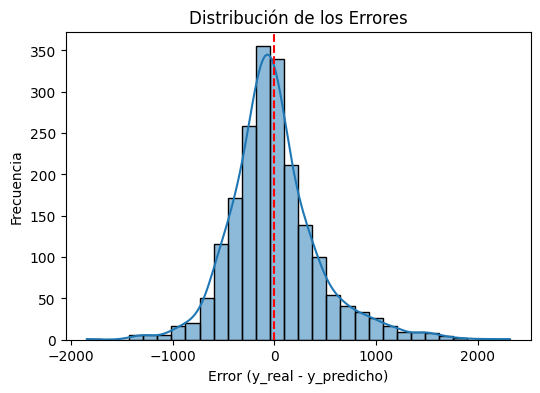

In [286]:
#Graficar la distribución de los errores
errores3 = y_test - y_test_pred3
plt.figure(figsize=(6,4))
sns.histplot(errores3, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Error (y_real - y_predicho)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Errores")
plt.show()

In [287]:
#Modelo de regresion polinomica con grado dos, regularizacion Ridge y estandarización de variables teniendo en cuenta los datos limpios

In [288]:
# Escalamos X, y
X_scaler3 = StandardScaler()
y_scaler3 = StandardScaler()
X_train_scaled3 = X_scaler3.fit_transform(X_train)
X_test_scaled3 = X_scaler3.transform(X_test)
y_train_scaled3 = y_scaler3.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled3 = y_scaler3.transform(y_test.values.reshape(-1, 1)).ravel()

# Generamos características polinómicas
grado = 2  
poly = PolynomialFeatures(degree=grado)
X_train_poly3 = poly.fit_transform(X_train_scaled3)
X_test_poly3 = poly.transform(X_test_scaled3)

# Validación cruzada para encontrar el mejor alpha en Ridge
alpha_values3 =  np.logspace(-1, 4, 50)
best_alpha3 = None
best_score3 = -float("inf")

for alpha in alpha_values3:
    modelo_ridge3 = Ridge(alpha=alpha)
    scores3 = cross_val_score(modelo_ridge3, X_train_poly3, y_train_scaled3, cv=10, scoring='r2')
    mean_score3 = scores3.mean()
    
    print(f"Alpha: {alpha}, R² promedio: {mean_score3:.4f}")
    
    if mean_score3 > best_score3:
        best_score3 = mean_score3
        best_alpha3 = alpha

print(f"\nMejor alpha encontrado: {best_alpha3}")

# Entrenar el modelo con el mejor alfa 
modelo_final3 = Ridge(alpha=best_alpha3)
modelo_final3.fit(X_train_poly3, y_train_scaled3)

# Predicciones en entrenamiento y prueba
y_train_pred_scaled3 = modelo_final3.predict(X_train_poly3)
y_test_pred_scaled3 = modelo_final3.predict(X_test_poly3)

# Desescalar las predicciones
y_train_pred3 = y_scaler3.inverse_transform(y_train_pred_scaled3.reshape(-1, 1)).ravel()
y_test_pred3 = y_scaler3.inverse_transform(y_test_pred_scaled3.reshape(-1, 1)).ravel()

# Calcular R² en entrenamiento y prueba
r2_train3 = r2_score(y_train, y_train_pred3)
r2_test3 = r2_score(y_test, y_test_pred3)

# Calcular RMSE
rmse_train3 = root_mean_squared_error(y_train, y_train_pred3)
rmse_test3 = root_mean_squared_error(y_test, y_test_pred3)

# Calcular MAPE evitando división por cero
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100

mape_train3 = mean_absolute_percentage_error(y_train, y_train_pred3)
mape_test3 = mean_absolute_percentage_error(y_test, y_test_pred3)

# Imprimir resultados
print(f"R² en entrenamiento: {r2_train3:.4f}")
print(f"R² en prueba: {r2_test3:.4f}")
print(f"RMSE en entrenamiento: {rmse_train3:.4f}")
print(f"RMSE en prueba: {rmse_test3:.4f}")
print(f"MAPE en entrenamiento: {mape_train3:.2f}%")
print(f"MAPE en prueba: {mape_test3:.2f}%")


Alpha: 0.1, R² promedio: 0.4980
Alpha: 0.12648552168552962, R² promedio: 0.4980
Alpha: 0.15998587196060582, R² promedio: 0.4980
Alpha: 0.20235896477251572, R² promedio: 0.4980
Alpha: 0.2559547922699536, R² promedio: 0.4980
Alpha: 0.3237457542817644, R² promedio: 0.4980
Alpha: 0.40949150623804254, R² promedio: 0.4981
Alpha: 0.5179474679231212, R² promedio: 0.4981
Alpha: 0.655128556859551, R² promedio: 0.4981
Alpha: 0.8286427728546845, R² promedio: 0.4981
Alpha: 1.0481131341546859, R² promedio: 0.4982
Alpha: 1.3257113655901096, R² promedio: 0.4982
Alpha: 1.6768329368110082, R² promedio: 0.4983
Alpha: 2.1209508879201904, R² promedio: 0.4983
Alpha: 2.682695795279726, R² promedio: 0.4984
Alpha: 3.39322177189533, R² promedio: 0.4985
Alpha: 4.291934260128778, R² promedio: 0.4986
Alpha: 5.428675439323859, R² promedio: 0.4987
Alpha: 6.8664884500430015, R² promedio: 0.4989
Alpha: 8.685113737513529, R² promedio: 0.4990
Alpha: 10.985411419875584, R² promedio: 0.4992
Alpha: 13.894954943731374, R² p

In [289]:
#Los tres modelos implementados con los datos del DataFrame datos_limpios, tambien se probaran con los datos del DataFrame datos_finales

In [290]:
#Para que los datos puedan ser leidos como numeros, es importante reemplazar la coma por un punto
datos_finales = datos_finales.replace(',', '.', regex=True).astype(float)

In [291]:
# Separar la variable objetivo (precio) y las variables predictoras
X1 = datos_finales[["latitude","longitude","bathrooms","bedrooms","square_feet","cityname","state","amenities_count","category","source","pets_allowed"]]
y1 = datos_finales['price']
# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [292]:
#Modelo de regresion lineal teniendo en cuenta los datos del DataFrame datos_finales

In [293]:
# Definir el modelo
model = LinearRegression()
# Entrenar el modelo con los datos originales
model.fit(X_train1, y_train1)
# Predicciones
y_pred_train1 = model.predict(X_train1)
y_pred_test1 = model.predict(X_test1)
# Evaluación del modelo
# R2
r2_train = r2_score(y_train1, y_pred_train1)
r2_test = r2_score(y_test1, y_pred_test1)
#RMSE
rmse_train = root_mean_squared_error(y_train1, y_pred_train1)  # RMSE
rmse_test = root_mean_squared_error(y_test1, y_pred_test1)
# Evitar división por cero en MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = mean_absolute_percentage_error(y_train1, y_pred_train1)
mape_test = mean_absolute_percentage_error(y_test1, y_pred_test1)

# Resultados
print("Métricas en Entrenamiento:")
print(f"R2: {r2_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAPE: {mape_train:.2f}%")

print("\nMétricas en Prueba:")
print(f"R2: {r2_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAPE: {mape_test:.2f}%")

Métricas en Entrenamiento:
R2: 0.3425
RMSE: 588.0339
MAPE: 33.55%

Métricas en Prueba:
R2: 0.3274
RMSE: 584.2186
MAPE: 33.74%


In [294]:
#Modelo de regresion lineal Ridge con estandarización de variables teniendo en cuenta los datos del DataFrame datos_finales

In [295]:
# Estandarizar las variables
scaler_X2 = StandardScaler()
scaler_y2 = StandardScaler()

X_train_scaled2 = scaler_X2.fit_transform(X_train1)
X_test_scaled2 = scaler_X2.transform(X_test1)

y_train_scaled2 = scaler_y2.fit_transform(y_train1.values.reshape(-1, 1)).ravel()
y_test_scaled2 = scaler_y2.transform(y_test1.values.reshape(-1, 1)).ravel()

# Definir los valores de alpha a probar
alpha_values2 =  np.logspace(-1, 4, 50)

best_alpha2 = None
best_score2 = -float("inf")

# Validación cruzada para encontrar el mejor alpha en Ridge
for alpha in alpha_values2:
    model2 = Ridge(alpha=alpha)
    scores2 = cross_val_score(model2, X_train_scaled2, y_train_scaled2, cv=10, scoring="r2")  # 10-fold CV
    mean_score2 = scores2.mean()
    
    print(f"Alpha: {alpha}, R² promedio en validación cruzada: {mean_score2:.4f}")
    
    if mean_score2 > best_score2:
        best_score2 = mean_score2
        best_alpha2 = alpha

print(f"\nMejor alpha encontrado: {best_alpha2}")

# Entrenar el modelo final con el mejor alpha
model_final2 = Ridge(alpha=best_alpha2)
model_final2.fit(X_train_scaled2, y_train_scaled2)

# Predicciones
y_pred_train_scaled2 = model_final2.predict(X_train_scaled2)
y_pred_test_scaled2 = model_final2.predict(X_test_scaled2)

# Desescalar las predicciones
y_pred_train2 = scaler_y2.inverse_transform(y_pred_train_scaled2.reshape(-1, 1)).ravel()
y_pred_test2 = scaler_y2.inverse_transform(y_pred_test_scaled2.reshape(-1, 1)).ravel()

# Evaluación del modelo
#R2
r2_train2 = r2_score(y_train1, y_pred_train2)
r2_test2 = r2_score(y_test1, y_pred_test2)
#RMSE
rmse_train2 = root_mean_squared_error(y_train1, y_pred_train2)
rmse_test2 = root_mean_squared_error(y_test1, y_pred_test2)
# Evitar división por cero en MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100

mape_train2 = mean_absolute_percentage_error(y_train1, y_pred_train2)
mape_test2 = mean_absolute_percentage_error(y_test1, y_pred_test2)

# Resultados
print("\nMétricas en Entrenamiento:")
print(f"R²: {r2_train2:.4f}")
print(f"RMSE: {rmse_train2:.4f}")
print(f"MAPE: {mape_train2:.2f}%")

print("\nMétricas en Prueba:")
print(f"R²: {r2_test2:.4f}")
print(f"RMSE: {rmse_test2:.4f}")
print(f"MAPE: {mape_test2:.2f}%")

# Mostrar coeficientes del modelo final
coeficientes_originales = model_final2.coef_ / scaler_y2.scale_
print("\nCoeficientes del modelo Ridge (desescalados):")
print(coeficientes_originales)

Alpha: 0.1, R² promedio en validación cruzada: 0.3403
Alpha: 0.12648552168552962, R² promedio en validación cruzada: 0.3403
Alpha: 0.15998587196060582, R² promedio en validación cruzada: 0.3403
Alpha: 0.20235896477251572, R² promedio en validación cruzada: 0.3403
Alpha: 0.2559547922699536, R² promedio en validación cruzada: 0.3403
Alpha: 0.3237457542817644, R² promedio en validación cruzada: 0.3403
Alpha: 0.40949150623804254, R² promedio en validación cruzada: 0.3403
Alpha: 0.5179474679231212, R² promedio en validación cruzada: 0.3403
Alpha: 0.655128556859551, R² promedio en validación cruzada: 0.3403
Alpha: 0.8286427728546845, R² promedio en validación cruzada: 0.3403
Alpha: 1.0481131341546859, R² promedio en validación cruzada: 0.3403
Alpha: 1.3257113655901096, R² promedio en validación cruzada: 0.3403
Alpha: 1.6768329368110082, R² promedio en validación cruzada: 0.3403
Alpha: 2.1209508879201904, R² promedio en validación cruzada: 0.3403
Alpha: 2.682695795279726, R² promedio en valid

In [296]:
print(f"\nMejor alpha encontrado: {best_alpha2}")
# Resultados
print("\nMétricas en Entrenamiento:")
print(f"R²: {r2_train2:.4f}")
print(f"RMSE: {rmse_train2:.4f}")
print(f"MAPE: {mape_train2:.2f}%")

print("\nMétricas en Prueba:")
print(f"R²: {r2_test2:.4f}")
print(f"RMSE: {rmse_test2:.4f}")
print(f"MAPE: {mape_test2:.2f}%")



Mejor alpha encontrado: 17.57510624854793

Métricas en Entrenamiento:
R²: 0.3425
RMSE: 588.0350
MAPE: 33.55%

Métricas en Prueba:
R²: 0.3274
RMSE: 584.2086
MAPE: 33.74%


In [297]:
#Modelo de regresion polinomica de grado tres con regularización Ridge y estandarización de variables, teniendo en cuenta los datos del DatFrame datos_finales 

In [298]:

# Escalamos X e Y
X_scaler3 = StandardScaler()
y_scaler3 = StandardScaler()

X_train_scaled3 = X_scaler3.fit_transform(X_train1)
X_test_scaled3 = X_scaler3.transform(X_test1)

y_train_scaled3 = y_scaler3.fit_transform(y_train1.values.reshape(-1, 1)).ravel()
y_test_scaled3 = y_scaler3.transform(y_test1.values.reshape(-1, 1)).ravel()

# Generamos características polinómicas
grado = 3 
poly = PolynomialFeatures(degree=grado)

X_train_poly3 = poly.fit_transform(X_train_scaled3)
X_test_poly3 = poly.transform(X_test_scaled3)

# Validación cruzada para encontrar el mejor alpha en Ridge
alpha_values3 =  np.logspace(-1, 4, 50)
best_alpha3 = None
best_score3 = -float("inf")

for alpha in alpha_values3:
    modelo_ridge3 = Ridge(alpha=alpha)
    scores3 = cross_val_score(modelo_ridge3, X_train_poly3, y_train_scaled3, cv=10, scoring='r2')
    mean_score3 = scores3.mean()
    
    print(f"Alpha: {alpha}, R² promedio: {mean_score3:.4f}")
    
    if mean_score3 > best_score3:
        best_score3 = mean_score3
        best_alpha3 = alpha

print(f"\nMejor alpha encontrado: {best_alpha3}")

# Entrenar el modelo final con el mejor alfa
modelo_final3 = Ridge(alpha=best_alpha3)
modelo_final3.fit(X_train_poly3, y_train_scaled3)

# Predicciones en entrenamiento y prueba
y_train_pred_scaled3 = modelo_final3.predict(X_train_poly3)
y_test_pred_scaled3 = modelo_final3.predict(X_test_poly3)

# Desescalar las predicciones
y_train_pred3 = y_scaler3.inverse_transform(y_train_pred_scaled3.reshape(-1, 1)).ravel()
y_test_pred3 = y_scaler3.inverse_transform(y_test_pred_scaled3.reshape(-1, 1)).ravel()

# Calcular R² en entrenamiento y prueba
r2_train3 = r2_score(y_train1, y_train_pred3)
r2_test3 = r2_score(y_test1, y_test_pred3)

# Calcular RMSE
rmse_train3 = root_mean_squared_error(y_train1, y_train_pred3)
rmse_test3 = root_mean_squared_error(y_test1, y_test_pred3)

# Calcular MAPE evitando división por cero
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100

mape_train3 = mean_absolute_percentage_error(y_train1, y_train_pred3)
mape_test3 = mean_absolute_percentage_error(y_test1, y_test_pred3)

# Imprimir resultados
print(f"R² en entrenamiento: {r2_train3:.4f}")
print(f"R² en prueba: {r2_test3:.4f}")
print(f"RMSE en entrenamiento: {rmse_train3:.4f}")
print(f"RMSE en prueba: {rmse_test3:.4f}")
print(f"MAPE en entrenamiento: {mape_train3:.2f}%")
print(f"MAPE en prueba: {mape_test3:.2f}%")
# Obtener coeficientes
coeficientes3 = modelo_final3.coef_
nombres_features3 = poly.get_feature_names_out()


Alpha: 0.1, R² promedio: 0.5472
Alpha: 0.12648552168552962, R² promedio: 0.5472
Alpha: 0.15998587196060582, R² promedio: 0.5472
Alpha: 0.20235896477251572, R² promedio: 0.5472
Alpha: 0.2559547922699536, R² promedio: 0.5473
Alpha: 0.3237457542817644, R² promedio: 0.5473
Alpha: 0.40949150623804254, R² promedio: 0.5474
Alpha: 0.5179474679231212, R² promedio: 0.5475
Alpha: 0.655128556859551, R² promedio: 0.5476
Alpha: 0.8286427728546845, R² promedio: 0.5478
Alpha: 1.0481131341546859, R² promedio: 0.5479
Alpha: 1.3257113655901096, R² promedio: 0.5481
Alpha: 1.6768329368110082, R² promedio: 0.5484
Alpha: 2.1209508879201904, R² promedio: 0.5488
Alpha: 2.682695795279726, R² promedio: 0.5492
Alpha: 3.39322177189533, R² promedio: 0.5497
Alpha: 4.291934260128778, R² promedio: 0.5504
Alpha: 5.428675439323859, R² promedio: 0.5512
Alpha: 6.8664884500430015, R² promedio: 0.5522
Alpha: 8.685113737513529, R² promedio: 0.5533
Alpha: 10.985411419875584, R² promedio: 0.5547
Alpha: 13.894954943731374, R² p

In [299]:
print(f"\nMejor alpha encontrado: {best_alpha3}")
print(f"R² en entrenamiento: {r2_train3:.4f}")
print(f"R² en prueba: {r2_test3:.4f}")
print(f"RMSE en entrenamiento: {rmse_train3:.4f}")
print(f"RMSE en prueba: {rmse_test3:.4f}")
print(f"MAPE en entrenamiento: {mape_train3:.2f}%")
print(f"MAPE en prueba: {mape_test3:.2f}%")


Mejor alpha encontrado: 471.48663634573944
R² en entrenamiento: 0.6329
R² en prueba: 0.6124
RMSE en entrenamiento: 439.3693
RMSE en prueba: 443.5220
MAPE en entrenamiento: 24.03%
MAPE en prueba: 24.55%


In [300]:
#Encontrar la mejor combinacion de variables para el modelo polinomico minimizando el RMSE

In [301]:
import itertools

In [302]:

# Cargar datos (suponiendo que ya tienes un DataFrame llamado 'datos_limpios')
X = datos_limpios[[	"amenities_count",	"category_housing/rent/home",	"category_housing/rent/short_term",	"has_photo_Thumbnail","has_photo_Yes","pets_allowed_Cats,Dogs"	,"pets_allowed_Dogs",	"pets_allowed_No",'source_Listanza', 'source_ListedBuy', 'source_RENTOCULAR', 'source_Real Estate Agent', 'source_RentDigs.com', 'source_RentLingo', 'source_rentbits', 'source_tenantcloud']]  # Variables predictoras
y = datos_finales['price'].values.reshape(-1, 1)  # Asegurar que es una matriz

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar X e y
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = pd.DataFrame(scaler_X.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler_X.transform(X_test), columns=X_test.columns)

y_train_scaled = scaler_y.fit_transform(y_train).ravel()  # ravel() para convertir a vector
y_test_scaled = scaler_y.transform(y_test).ravel()

# Listar todas las variables
variables = X_train_scaled.columns.tolist()

# Inicializar valores para la mejor combinación
mejor_rmse = np.inf
mejor_subset = None
mejor_modelo = None

# Probar todas las combinaciones de variables
for r in range(1, len(variables) + 1):  # Desde 1 variable hasta todas
    for subset in itertools.combinations(variables, r):  # Generar combinaciones
        subset = list(subset)

        # Seleccionar solo las variables en esta combinación
        X_train_subset = X_train_scaled[subset]
        X_test_subset = X_test_scaled[subset]

        # Generar características polinómicas (grado 3)
        poly = PolynomialFeatures(degree=3, include_bias=False)
        X_train_poly = poly.fit_transform(X_train_subset)
        X_test_poly = poly.transform(X_test_subset)

        # Entrenar modelo Ridge con alpha=100
        model = Ridge(alpha=596.3623316594643)
        model.fit(X_train_poly, y_train_scaled)

        # Predicciones y evaluación
        y_pred_test_scaled = model.predict(X_test_poly)

        # Invertir la transformación de la predicción**
        y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).ravel()

        # Calcular RMSE en escala original
        rmse_test = root_mean_squared_error(y_test, y_pred_test)  # RMSE

        # Guardar la mejor combinación (menor RMSE)
        if rmse_test < mejor_rmse:
            mejor_rmse = rmse_test
            mejor_subset = subset
            mejor_modelo = model

# Resultados
print(f"Mejor combinación de variables: {mejor_subset}")
print(f"Mejor RMSE en prueba: {mejor_rmse:.4f}")


KeyboardInterrupt: 